Import data science packages


In [302]:
import gym
import numpy as np
import matplotlib.pyplot as plt


# Create the FrozenLake environment
env = gym.make('FrozenLake-v1',is_slippery=False)
env.seed(42)

[42]

Check the transition probability value for a single test

Environment details:
Action Space: Discrete(4)
Observation Space: Discrete(16)
State Space Size: 16
Action Space Size: 4

Environment:


array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
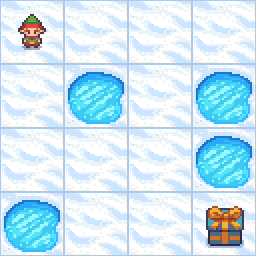

In [303]:
# Print the details of the environment
print("Environment details:")
print("Action Space:", env.action_space)
print("Observation Space:", env.observation_space)
print("State Space Size:", env.observation_space.n)
print("Action Space Size:", env.action_space.n)
print("\nEnvironment:")
env.reset()
env.render(mode='rgb_array')


In [304]:
# Initialize policy and value tables
num_states = env.observation_space.n
num_actions = env.action_space.n

# Initialize a policy with equal probability for either direction
policy = np.ones((num_states, num_actions)) / num_actions

# Initialize the value table with zeros
value_table = np.zeros(num_states)

# goal state
goal_state = 15

print("Initial Policy:\n", policy)
print("\nInitial Value Table:\n", value_table)


Initial Policy:
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]

Initial Value Table:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [305]:
# initial Q table

Q = np.ones((num_states, num_actions))/num_actions
print(Q)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [306]:
# prompt: run random episodes

def run_random_episodes(env, num_episodes ):
  """Runs random episodes in the environment."""

  for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
      # Select a random action
      e = 0.5
      gamma = 0.99
      if np.random.random() < e:
        action = np.random.randint(num_actions)
      else:
        action = np.argmax(Q[state])

      # Take a step in the environment
      next_state, reward, done, info = env.step(action)

      if done:
        if next_state == goal_state:
          reward = 2
        else: # falls in hole
          reward =  -1
      else:
        reward = -0.1


      #Choose next action
      next_action = np.argmax(Q[next_state])

      # Update the total reward
      if(done):
        Q[state,action] +=reward

      else:
        Q[state,action]+=reward + gamma*(Q[next_state,next_action]-Q[state,action])


      total_reward += reward

      # Move to the next state
      state = next_state

    # Print episode information
    # print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# Run random episodes
run_random_episodes(env,100000)


In [307]:
Q

array([[ 7.66175621e+04,  7.66177447e+04,  7.66133833e+04,
         7.66176425e+04],
       [ 7.66176021e+04, -7.83775000e+03,  7.65912612e+04,
         7.66091836e+04],
       [ 7.65935003e+04,  7.65611062e+04,  7.65910801e+04,
         7.65933753e+04],
       [ 7.65933572e+04, -8.92750000e+02,  7.65189872e+04,
         7.61850210e+04],
       [ 7.66177445e+04,  7.66197671e+04, -1.42397500e+04,
         7.66176025e+04],
       [ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01],
       [-3.96775000e+03,  7.66135277e+04, -4.01775000e+03,
         7.65926366e+04],
       [ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01],
       [ 7.66178453e+04, -1.08007500e+04,  7.66218864e+04,
         7.66176237e+04],
       [ 7.66178452e+04,  7.66197276e+04,  7.66220076e+04,
        -8.54175000e+03],
       [ 7.66177616e+04,  7.66241288e+04, -6.78175000e+03,
         7.66129315e+04],
       [ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
      

In [308]:
# show actions and display graphically

for state in range(num_states):
  action = np.argmax(Q[state])
  if action == 0:
    action = "<"
  elif action == 1:
    action = "V"
  elif action == 2:
    action = ">"
  elif action == 3:
    action = "^"
  print(action,end="")
  if (state+1)%4==0:
    print()

V<<<
V<V<
>>V<
<>><


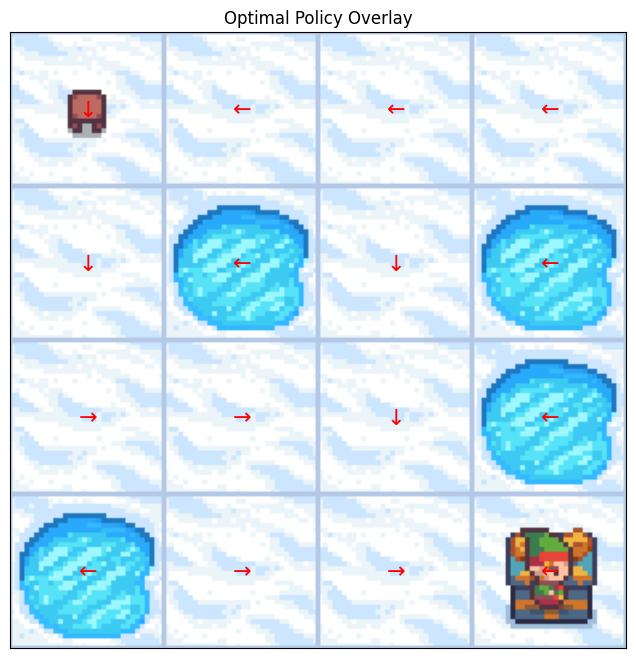

In [309]:
import matplotlib.patches as patches
from PIL import Image

def render_env_with_policy(env, policy, filename='policy_render.png'):
    """
    Renders the environment and overlays the policy directions on the image.

    Args:
        env: The environment object (FrozenLake in this case).
        policy: The policy matrix (one-hot encoded).
        filename: Name of the file to save the rendered image.
    """
    # Get the environment's rendered image
    img = env.render(mode='rgb_array')

    # Reshape the policy to match the grid size of the environment
    grid_size = int(np.sqrt(env.observation_space.n))
    policy_grid = np.argmax(policy, axis=1).reshape((grid_size, grid_size))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img)

    # Mapping from action index to direction
    action_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

    # Add policy directions to the rendered image
    for i in range(grid_size):
        for j in range(grid_size):
            direction = action_map[policy_grid[i, j]]
            ax.text(j * (img.shape[1] // grid_size) + (img.shape[1] // (2 * grid_size)),
                    i * (img.shape[0] // grid_size) + (img.shape[0] // (2 * grid_size)),
                    direction,
                    ha='center', va='center', fontsize=16, color='red')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.title('Optimal Policy Overlay')
    plt.savefig(filename)
    plt.show()

# Render the environment with the optimal policy overlay
render_env_with_policy(env, Q)
